In [11]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install numpy opencv-python pillow scikit-learn matplotlib pandas scipy torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install seaborn

In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU name: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.6.0+cu118
CUDA available: True
GPU name: NVIDIA GeForce RTX 3070 Ti Laptop GPU


In [1]:
import torch
import time

# Move tensor to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Simple matrix multiplication
size = 10000
a = torch.randn(size, size).to(device)
b = torch.randn(size, size).to(device)

start = time.time()
c = torch.matmul(a, b)
end = time.time()

print(f"Matrix multiplication took {end - start:.4f} seconds on {device}")

Using device: cuda
Matrix multiplication took 0.1388 seconds on cuda


In [2]:
# import os
# import cv2
# import numpy as np
# import pandas as pd
# from PIL import Image
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms

# # Print current working directory for debugging
# print("Current working directory:", os.getcwd())

# # Enhancement Functions
# def apply_um(image, radius=5, amount=2):
#     blurred = cv2.GaussianBlur(image, (0, 0), radius)
#     sharpened = cv2.addWeighted(image, 1 + amount, blurred, -amount, 0)
#     return sharpened

# def apply_hef(image, d0=70):
#     image_fft = np.fft.fft2(image)
#     image_fft_shift = np.fft.fftshift(image_fft)
#     rows, cols = image.shape
#     crow, ccol = rows // 2, cols // 2
#     mask = np.ones((rows, cols), np.uint8)
#     for i in range(rows):
#         for j in range(cols):
#             dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
#             mask[i, j] = 1 - np.exp(-(dist**2) / (2 * (d0**2)))
#     filtered = image_fft_shift * mask
#     filtered_shift = np.fft.ifftshift(filtered)
#     image_back = np.fft.ifft2(filtered_shift)
#     image_hef = np.abs(image_back)
#     image_hef = cv2.normalize(image_hef, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#     return cv2.equalizeHist(image_hef)

# # Parse Metadata from CSV
# def load_metadata(metadata_file):
#     if not os.path.exists(metadata_file):
#         raise FileNotFoundError(f"Metadata file not found at {metadata_file}")
    
#     df = pd.read_csv(metadata_file)
#     label_dict = {}
    
#     for _, row in df.iterrows():
#         img_name = str(row['study_id']).strip()
#         if not img_name.startswith("CHNCXR_") or not img_name.endswith(".png"):
#             print(f"Skipping invalid study_id: {img_name}")
#             continue
        
#         # Use filename-based label
#         label = 1 if '_1' in img_name else 0
#         label_dict[img_name] = label
    
#     # Debug: Print label distribution
#     labels = list(label_dict.values())
#     print(f"Label distribution: {sum(1 for l in labels if l == 0)} normal (0), {sum(1 for l in labels if l == 1)} TB (1)")
    
#     return label_dict

# # Custom Dataset
# class ShenzhenDataset(Dataset):
#     def __init__(self, image_dir, metadata_file, transform=None):
#         self.image_dir = image_dir
#         self.transform = transform
        
#         print("Looking for images in:", image_dir)
#         if not os.path.exists(image_dir):
#             raise FileNotFoundError(f"Image directory not found: {image_dir}")
        
#         self.images = [f for f in os.listdir(image_dir) if f.endswith('.png')]
#         self.metadata = load_metadata(metadata_file)
        
#         self.valid_images = [img for img in self.images if img in self.metadata]
#         self.labels = [self.metadata[img] for img in self.valid_images]
        
#         if len(self.valid_images) == 0:
#             raise ValueError("No valid images found matching metadata!")
#         else:
#             print(f"Found {len(self.valid_images)} valid images with metadata.")
    
#     def __len__(self):
#         return len(self.valid_images)
    
#     def __getitem__(self, idx):
#         img_name = self.valid_images[idx]
#         img_path = os.path.join(self.image_dir, img_name)
#         label = self.labels[idx]
#         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
#         if img is None:
#             raise FileNotFoundError(f"Image not found: {img_path}")
        
#         img_um = apply_um(img)
#         img_hef = apply_hef(img)
        
#         img_um = Image.fromarray(img_um)
#         img_hef = Image.fromarray(img_hef)
        
#         if self.transform:
#             img_um = self.transform(img_um)
#             img_hef = self.transform(img_hef)
        
#         return img_um, img_hef, label

# # Transforms
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5], std=[0.5])
# ])

# # Load dataset with absolute paths
# image_dir = r"C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\datasets\shenzhen\images"
# metadata_file = r"C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\datasets\shenzhen\shenzhen_metadata.csv"
# dataset = ShenzhenDataset(image_dir, metadata_file, transform=transform)

# # Split dataset
# train_size = int(0.7 * len(dataset))
# val_size = int(0.2 * len(dataset))
# test_size = len(dataset) - train_size - val_size
# train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
#     dataset, [train_size, val_size, test_size]
# )

# # DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
# val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)
# test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

# print(f"Train: {len(train_loader)} batches, Val: {len(val_loader)} batches, Test: {len(test_loader)} batches")

Current working directory: C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\src
Looking for images in: C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\datasets\shenzhen\images
Label distribution: 326 normal (0), 336 TB (1)
Found 662 valid images with metadata.
Looking for images in: C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\datasets\shenzhen\images
Label distribution: 326 normal (0), 336 TB (1)
Found 662 valid images with metadata.
Train: 116 batches, Val: 33 batches, Test: 17 batches


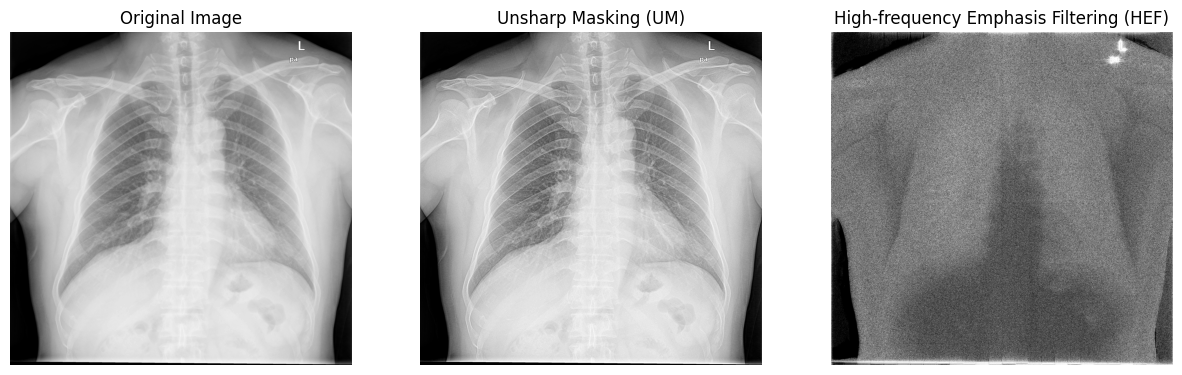

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

# Set OpenCV to use a single thread to avoid multiprocessing issues
cv2.setNumThreads(0)

# Print current working directory for debugging
print("Current working directory:", os.getcwd())

# Enhancement Functions
def apply_um(image, radius=5, amount=2):
    blurred = cv2.GaussianBlur(image, (0, 0), radius)
    sharpened = cv2.addWeighted(image, 1 + amount, blurred, -amount, 0)
    return sharpened

def apply_hef(image, d0=70):
    image_fft = np.fft.fft2(image)
    image_fft_shift = np.fft.fftshift(image_fft)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = 1 - np.exp(-(dist**2) / (2 * (d0**2)))
    filtered = image_fft_shift * mask
    filtered_shift = np.fft.ifftshift(filtered)
    image_back = np.fft.ifft2(filtered_shift)
    image_hef = np.abs(image_back)
    image_hef = cv2.normalize(image_hef, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return cv2.equalizeHist(image_hef)

# Parse Metadata from CSV
def load_metadata(metadata_file):
    if not os.path.exists(metadata_file):
        raise FileNotFoundError(f"Metadata file not found at {metadata_file}")
    
    df = pd.read_csv(metadata_file)
    label_dict = {}
    
    for _, row in df.iterrows():
        img_name = str(row['study_id']).strip()
        if not img_name.startswith("CHNCXR_") or not img_name.endswith(".png"):
            print(f"Skipping invalid study_id: {img_name}")
            continue
        
        label = 1 if '_1' in img_name else 0
        label_dict[img_name] = label
    
    labels = list(label_dict.values())
    print(f"Label distribution: {sum(1 for l in labels if l == 0)} normal (0), {sum(1 for l in labels if l == 1)} TB (1)")
    
    return label_dict

# Custom Dataset
class ShenzhenDataset(Dataset):
    def __init__(self, image_dir, metadata_file, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        
        print("Looking for images in:", image_dir)
        if not os.path.exists(image_dir):
            raise FileNotFoundError(f"Image directory not found: {image_dir}")
        
        self.images = [f for f in os.listdir(image_dir) if f.endswith('.png')]
        self.metadata = load_metadata(metadata_file)
        
        self.valid_images = [img for img in self.images if img in self.metadata]
        self.labels = [self.metadata[img] for img in self.valid_images]
        
        if len(self.valid_images) == 0:
            raise ValueError("No valid images found matching metadata!")
        else:
            print(f"Found {len(self.valid_images)} valid images with metadata.")
    
    def __len__(self):
        return len(self.valid_images)
    
    def __getitem__(self, idx):
        try:
            img_name = self.valid_images[idx]
            img_path = os.path.join(self.image_dir, img_name)
            label = self.labels[idx]
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            if img is None:
                raise FileNotFoundError(f"Image not found or corrupted: {img_path}")
            
            img_um = apply_um(img)
            img_hef = apply_hef(img)
            
            img_um = Image.fromarray(img_um)
            img_hef = Image.fromarray(img_hef)
            
            if self.transform:
                img_um = self.transform(img_um)
                img_hef = self.transform(img_hef)
            
            return img_um, img_hef, label
        except Exception as e:
            print(f"Error loading image {img_name}: {str(e)}")
            raise e

# Transforms with augmentation for training
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Transforms without augmentation for validation and testing
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset with appropriate transforms
image_dir = r"C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\datasets\shenzhen\images"
metadata_file = r"C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\datasets\shenzhen\shenzhen_metadata.csv"

# Create datasets with different transforms
train_dataset_full = ShenzhenDataset(image_dir, metadata_file, transform=train_transform)
val_test_dataset = ShenzhenDataset(image_dir, metadata_file, transform=val_test_transform)

# Split dataset
train_size = int(0.7 * len(train_dataset_full))
val_size = int(0.2 * len(train_dataset_full))
test_size = len(train_dataset_full) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    train_dataset_full, [train_size, val_size, test_size]
)

# Assign val_test_transform to val and test datasets
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

# DataLoaders with num_workers=0 for stability
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=0)

print(f"Train: {len(train_loader)} batches, Val: {len(val_loader)} batches, Test: {len(test_loader)} batches")

# Visualize the first image with enhancements (optional)
first_img_path = r"C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\datasets\shenzhen\images\CHNCXR_0001_0.png"
img = cv2.imread(first_img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"Image not found at {first_img_path}")

img_um = apply_um(img)
img_hef = apply_hef(img)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_um, cmap='gray')
plt.title('Unsharp Masking (UM)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_hef, cmap='gray')
plt.title('High-frequency Emphasis Filtering (HEF)')
plt.axis('off')
plt.show()

In [4]:
import torch
import torch.nn as nn
import torchvision.models as models

class HybridEfficientNet(nn.Module):
    def __init__(self, dropout_rate=0.7):  # Increased dropout rate
        super(HybridEfficientNet, self).__init__()
        self.base_um = models.efficientnet_b4(pretrained=True)
        self.base_hef = models.efficientnet_b4(pretrained=True)
        
        for param in self.base_um.features[:4].parameters():
            param.requires_grad = False
        for param in self.base_hef.features[:4].parameters():
            param.requires_grad = False
        
        self.base_um.features[0][0] = nn.Conv2d(1, 48, kernel_size=3, stride=2, padding=1, bias=False)
        self.base_hef.features[0][0] = nn.Conv2d(1, 48, kernel_size=3, stride=2, padding=1, bias=False)
        
        self.fusion = nn.Conv2d(3584, 1792, kernel_size=1)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(1792, 2)
    
    def forward(self, x_um, x_hef):
        feat_um = self.base_um.features(x_um)
        feat_hef = self.base_hef.features(x_hef)
        feat_concat = torch.cat((feat_um, feat_hef), dim=1)
        feat_fused = self.fusion(feat_concat)
        out = self.gap(feat_fused)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc(out)
        return out

# Instantiate the model
model = HybridEfficientNet(dropout_rate=0.7)
print(model)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(f"Model is running on: {device}")

C:\Users\plawa\anaconda3\envs\Tuberculosis\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\plawa\anaconda3\envs\Tuberculosis\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


HybridEfficientNet(
  (base_um): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(1, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
              (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
             

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchmetrics import Accuracy, Precision, Recall, F1Score
import matplotlib.pyplot as plt
import os

def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=0.0001, patience=5):
    class_weights = torch.tensor([1/326, 1/336], dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-3)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=1, verbose=True)
    
    accuracy = Accuracy(task='binary', num_classes=2).to(device)
    precision = Precision(task='binary', num_classes=2).to(device)
    recall = Recall(task='binary', num_classes=2).to(device)
    f1 = F1Score(task='binary', num_classes=2).to(device)
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    train_f1s, val_f1s = [], []
    
    best_val_f1 = 0.0
    epochs_no_improve = 0
    early_stop = False
    output_dir = r"C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\outputs"
    os.makedirs(output_dir, exist_ok=True)
    
    for epoch in range(num_epochs):
        if early_stop:
            print("Early stopping triggered.")
            break
        
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        
        model.train()
        running_loss = 0.0
        train_preds, train_targets = [], []
        
        for img_um, img_hef, labels in train_loader:
            img_um, img_hef, labels = img_um.to(device), img_hef.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(img_um, img_hef)
            loss = criterion(outputs, labels)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_preds.extend(predicted.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())
        
        train_loss = running_loss / len(train_loader)
        train_acc = accuracy(torch.tensor(train_preds), torch.tensor(train_targets))
        train_f1_score = f1(torch.tensor(train_preds), torch.tensor(train_targets))
        
        train_losses.append(train_loss)
        train_accuracies.append(train_acc.item())
        train_f1s.append(train_f1_score.item())
        
        model.eval()
        val_loss = 0.0
        val_preds, val_targets = [], []
        
        with torch.no_grad():
            for img_um, img_hef, labels in val_loader:
                img_um, img_hef, labels = img_um.to(device), img_hef.to(device), labels.to(device)
                outputs = model(img_um, img_hef)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())
        
        val_loss = val_loss / len(val_loader)
        val_acc = accuracy(torch.tensor(val_preds), torch.tensor(val_targets))
        val_f1_score = f1(torch.tensor(val_preds), torch.tensor(val_targets))
        
        val_losses.append(val_loss)
        val_accuracies.append(val_acc.item())
        val_f1s.append(val_f1_score.item())
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1_score:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1_score:.4f}")
        
        epoch_model_path = os.path.join(output_dir, f"hybrid_efficientnet_epoch_{epoch+1}.pth")
        torch.save(model.state_dict(), epoch_model_path)
        print(f"Model saved to {epoch_model_path}")
        
        if val_f1_score > best_val_f1:
            best_val_f1 = val_f1_score
            best_model_path = os.path.join(output_dir, "hybrid_efficientnet_best.pth")
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved to {best_model_path} with Val F1: {best_val_f1:.4f}")
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            print(f"Validation F1 has not improved for {patience} epochs. Stopping training.")
            early_stop = True
        
        scheduler.step(val_f1_score)
    
    epochs_range = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 3, 3)
    plt.plot(epochs_range, train_f1s, label='Train F1')
    plt.plot(epochs_range, val_f1s, label='Val F1')
    plt.title('Training and Validation F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return model

# Train the model
if __name__ == '__main__':
    num_epochs = 10
    learning_rate = 0.0001
    patience = 5
    model = train_model(model, train_loader, val_loader, num_epochs=num_epochs, learning_rate=learning_rate, patience=patience)


Epoch 1/10


Test Accuracy: 0.8955
Test Precision: 0.8857
Test Recall: 0.9118
Test F1 Score: 0.8986


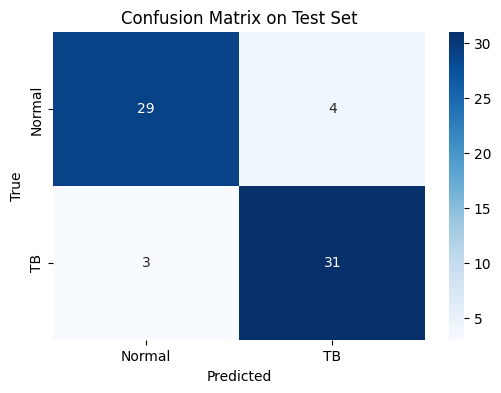

In [6]:
import torch
from torchmetrics import Accuracy, Precision, Recall, F1Score, ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns

def test_model(model, test_loader, model_path, device):
    # Load the best model
    model.load_state_dict(torch.load(model_path))
    model.eval()
    
    # Initialize metrics on the correct device
    accuracy = Accuracy(task='binary', num_classes=2).to(device)
    precision = Precision(task='binary', num_classes=2).to(device)
    recall = Recall(task='binary', num_classes=2).to(device)
    f1 = F1Score(task='binary', num_classes=2).to(device)
    conf_matrix = ConfusionMatrix(task='binary', num_classes=2).to(device)
    
    test_preds, test_targets = [], []
    
    with torch.no_grad():
        for img_um, img_hef, labels in test_loader:
            img_um, img_hef, labels = img_um.to(device), img_hef.to(device), labels.to(device)
            outputs = model(img_um, img_hef)
            _, predicted = torch.max(outputs, 1)
            test_preds.extend(predicted.cpu().numpy())  # Still move to CPU for collection
            test_targets.extend(labels.cpu().numpy())   # Still move to CPU for collection
    
    # Convert predictions and targets to tensors and move to the correct device
    test_preds_tensor = torch.tensor(test_preds).to(device)
    test_targets_tensor = torch.tensor(test_targets).to(device)
    
    # Compute metrics
    test_acc = accuracy(test_preds_tensor, test_targets_tensor)
    test_precision = precision(test_preds_tensor, test_targets_tensor)
    test_recall = recall(test_preds_tensor, test_targets_tensor)
    test_f1 = f1(test_preds_tensor, test_targets_tensor)
    cm = conf_matrix(test_preds_tensor, test_targets_tensor)
    
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm.cpu().numpy(), annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'TB'], yticklabels=['Normal', 'TB'])
    plt.title('Confusion Matrix on Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Test the best model
best_model_path = r"C:\Users\plawa\anaconda3\envs\Tuberculosis\tb_detection\outputs\hybrid_efficientnet_best.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_model(model, test_loader, best_model_path, device)